<a href="https://colab.research.google.com/github/merazAfridi/Applying-Multiple-CNNs_Pediatric-Pneumonia-Classification/blob/main/Xception_Pediatric_Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

gazimerazmehedi_pediatric_pneumonia_path = kagglehub.dataset_download('gazimerazmehedi/pediatric-pneumonia')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person1676_virus_2892.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person1650_virus_2852.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person22_virus_55.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person122_bacteria_582.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person85_bacteria_417.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person79_virus_148.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person29_virus_64.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person123_bacteria_587.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person75_virus_136.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person153_bacteria_725.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person173_bacteria_831.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person16_virus_47.jpeg
/kaggle/input/pediatric-pneumonia/test/PNEUMONIA/person138_bacteria_659.jpeg
/kaggle/input/pediatric-p

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Image Dimensions and Batch Size
img_height, img_width = 128, 128
batch_size = 32


In [ ]:
#Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
#Load Training Data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/pediatric-pneumonia/train/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)


Found 4187 images belonging to 2 classes.


In [ ]:
#Load Validation Data
validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/pediatric-pneumonia/train/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1045 images belonging to 2 classes.


In [ ]:
# Step 6: Load Test Data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # No augmentation for test data

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/pediatric-pneumonia/test/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


In [ ]:
#Print Shapes and Sizes of Datasets
print(f'Train Data: {train_generator.n} images')
print(f'Validation Data: {validation_generator.n} images')
print(f'Test Data: {test_generator.n} images')


Train Data: 4187 images
Validation Data: 1045 images
Test Data: 624 images


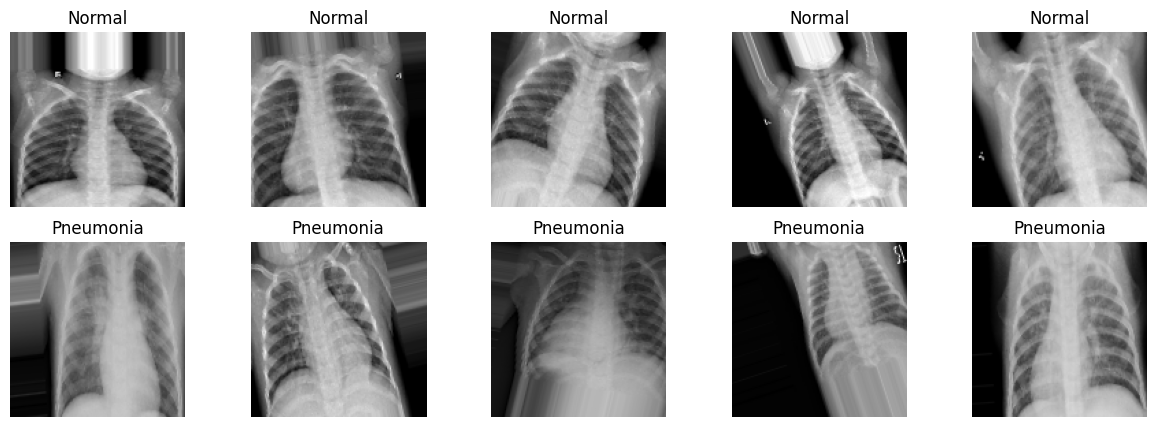

In [ ]:
# Display First 5 Normal and Pneumonia Training Samples
def display_samples(generator, num_samples=5):
    plt.figure(figsize=(15, 5))
    normal_count = 0
    pneumonia_count = 0

    for x_batch, y_batch in generator:
        for i in range(len(y_batch)):
            if y_batch[i] == 0 and normal_count < num_samples:
                plt.subplot(2, num_samples, normal_count + 1)
                plt.imshow(x_batch[i])
                plt.title('Normal')
                plt.axis('off')
                normal_count += 1
            elif y_batch[i] == 1 and pneumonia_count < num_samples:
                plt.subplot(2, num_samples, num_samples + pneumonia_count + 1)
                plt.imshow(x_batch[i])
                plt.title('Pneumonia')
                plt.axis('off')
                pneumonia_count += 1

            if normal_count >= num_samples and pneumonia_count >= num_samples:
                break
        if normal_count >= num_samples and pneumonia_count >= num_samples:
            break

# Display
display_samples(train_generator)


In [ ]:
# Print Total Size and Shape of Datasets
print(f'Train Data Size: {train_generator.n} images')
print(f'Validation Data Size: {validation_generator.n} images')
print(f'Test Data Size: {test_generator.n} images')

x_train, y_train = next(train_generator)
x_val, y_val = next(validation_generator)
x_test, y_test = next(test_generator)

print(f'Train Data Shape: {x_train.shape} | Labels Shape: {y_train.shape}') #each batch
print(f'Validation Data Shape: {x_val.shape} | Labels Shape: {y_val.shape}')
print(f'Test Data Shape: {x_test.shape} | Labels Shape: {y_test.shape}')


Train Data Size: 4187 images
Validation Data Size: 1045 images
Test Data Size: 624 images
Train Data Shape: (32, 128, 128, 3) | Labels Shape: (32,)
Validation Data Shape: (32, 128, 128, 3) | Labels Shape: (32,)
Test Data Shape: (32, 128, 128, 3) | Labels Shape: (32,)


In [ ]:
# Xception

from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load Xception with pretrained weights from ImageNet, excluding the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Display model summary
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_13[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_36[0][0]    

 Total params: 29,250,601 (111.58 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, AUC

# Instantiate metrics
precision_metric = Precision()
auc_metric = AUC()

# save model
checkpoint_filepath = '/kaggle/working/best_model_Xception.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=1
)

#Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_metric, auc_metric])

# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 76s 489ms/step - accuracy: 0.7987 - auc_12: 0.7853 - loss: 2.6277 - precision_14: 0.8663 - val_accuracy: 0.8896 - val_auc_12: 0.9516 - val_loss: 0.2563 - val_precision_14: 0.9488
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/130 ━━━━━━━━━━━━━━━━━━━━ 9:06 4s/step - accuracy: 0.8889 - auc_12: 0.9571 - loss: 0.2369 - precision_14: 0.9474

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8889 - auc_12: 0.9571 - loss: 0.2369 - precision_14: 0.9474 - val_accuracy: 0.8571 - val_auc_12: 0.9082 - val_loss: 0.3666 - val_precision_14: 0.8667
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 466ms/step - accuracy: 0.8877 - auc_12: 0.9453 - loss: 0.2616 - precision_14: 0.9198 - val_accuracy: 0.9062 - val_auc_12: 0.9667 - val_loss: 0.2046 - val_precision_14: 0.9282
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - auc_12: 0.9486 - loss: 0.2436 - precision_14: 0.9200 - val_accuracy: 0.8095 - val_auc_12: 0.9630 - val_loss: 0.3676 - val_precision_14: 0.7500
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 465ms/step - accuracy: 0.8946 - auc_12: 0.9473 - loss: 0.2514 - precision_14: 0.9267 - val_accuracy: 0.9189 - val_auc_12: 0.9644 - val_loss: 0.2132 - val_precision_14: 0.9356
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - auc_12: 0.9948 - loss: 0.1550 - precision_14: 0.9583 - val_accuracy

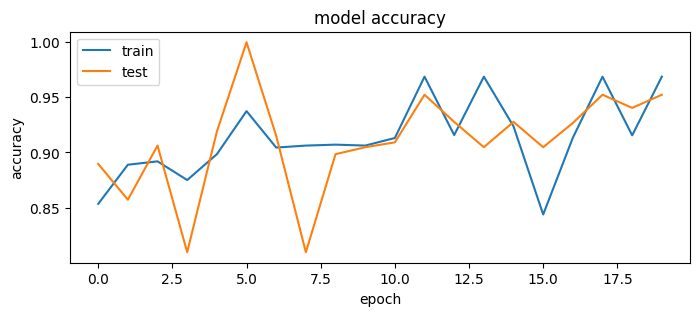

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(8, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



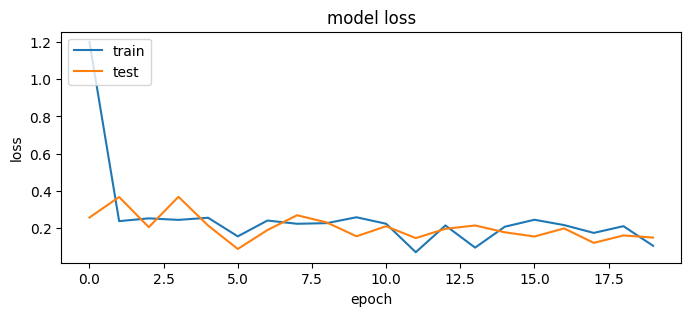

In [ ]:
# Summarize history for loss
plt.figure(figsize=(8, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

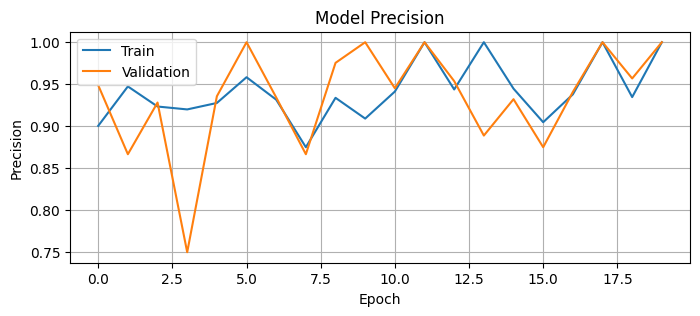

In [ ]:
# Summarize history for Precision
plt.figure(figsize=(8, 3))
plt.plot(history.history['precision_14'])
plt.plot(history.history['val_precision_14'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()


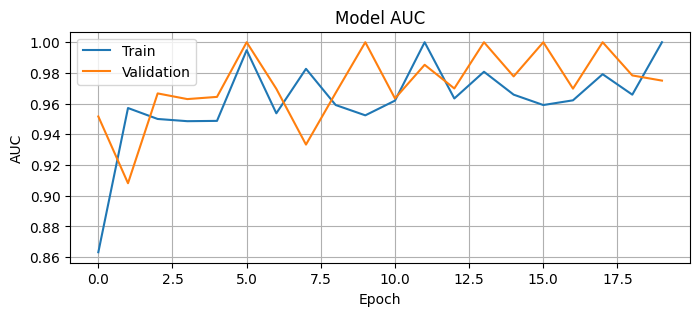

In [ ]:
# Summarize history for AUC
plt.figure(figsize=(8, 3))
plt.plot(history.history['auc_12'])
plt.plot(history.history['val_auc_12'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# Best Training
best_train_loss = min(history.history['loss'])
best_val_loss = min(history.history['val_loss'])
best_train_accuracy = max(history.history['accuracy'])
best_val_accuracy = max(history.history['val_accuracy'])
best_train_precision = max(history.history['precision_14'])
best_val_precision = max(history.history['val_precision_14'])
best_train_auc = max(history.history['auc_12'])
best_val_auc = max(history.history['val_auc_12'])

# Print the best performing metrics
print(f'Best Training Loss: {best_train_loss:.6f}')
print(f'Best Validation Loss: {best_val_loss:.6f}')
print(f'Best Training Accuracy: {best_train_accuracy:.6f}')
print(f'Best Validation Accuracy: {best_val_accuracy:.6f}')
print(f'Best Training Precision: {best_train_precision:.6f}')
print(f'Best Validation Precision: {best_val_precision:.6f}')
print(f'Best Training AUC: {best_train_auc:.6f}')
print(f'Best Validation AUC: {best_val_auc:.6f}')


Best Training Loss: 0.069745
Best Validation Loss: 0.087229
Best Training Accuracy: 0.968750
Best Validation Accuracy: 1.000000
Best Training Precision: 1.000000
Best Validation Precision: 1.000000
Best Training AUC: 1.000000
Best Validation AUC: 1.000000


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

TEST_DIR = '/kaggle/input/pediatric-pneumonia/test/'

# Get true labels from the directory structure
true_labels = []
for filename in test_generator.filenames:
    if 'NORMAL' in filename:
        true_labels.append(0)  # Normal
    else:
        true_labels.append(1)  # Pneumonia

true_labels = np.array(true_labels)

#predictions
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step


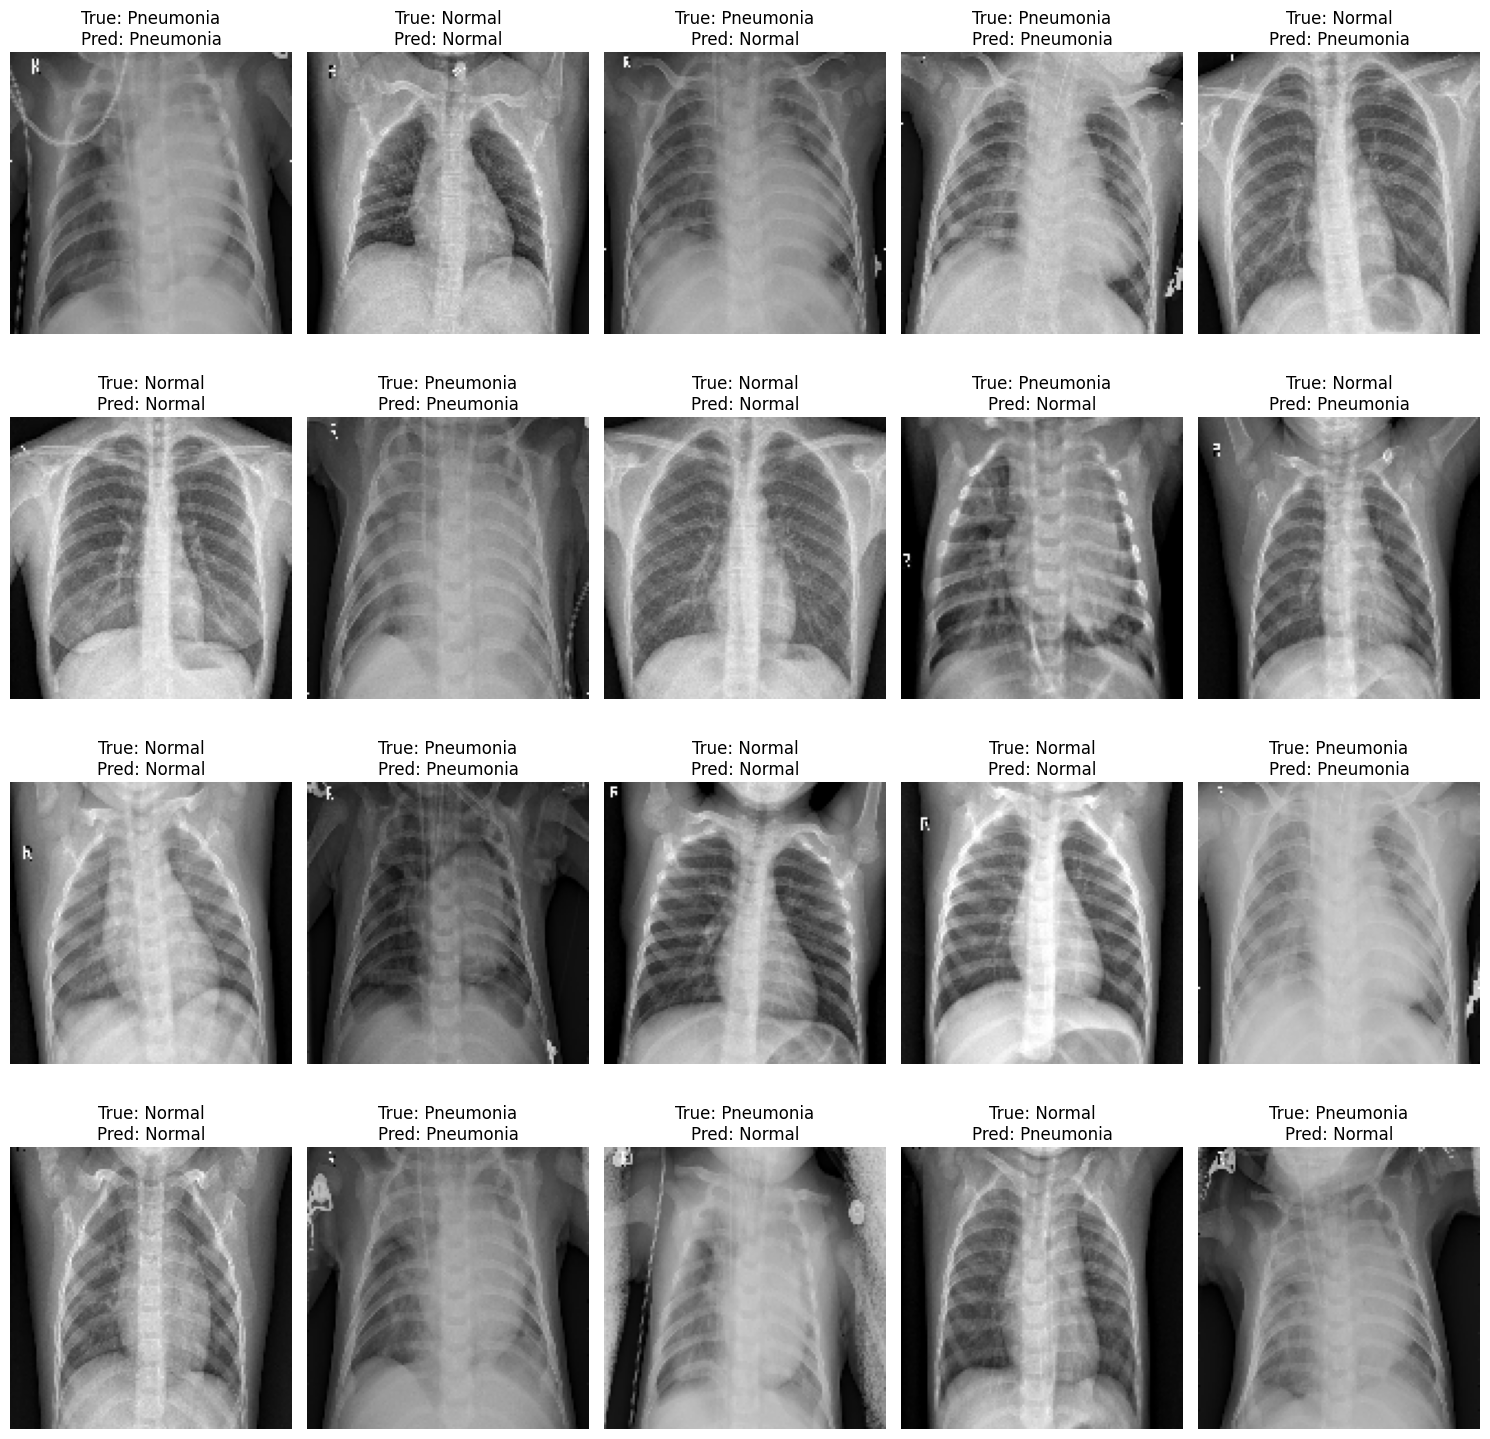

In [ ]:
#visualize some actual vs predicted
def visualize_predictions_grid(test_generator, predicted_classes, true_labels, num_images_per_class=10):
    #initialize images based on true labels
    normal_images = []
    pneumonia_images = []

    # Collect images based on their true labels
    for img_batch, label_batch in test_generator:
        for i in range(len(img_batch)):
            if label_batch[i] == 0 and len(normal_images) < num_images_per_class:
                normal_images.append((img_batch[i], 0))
            elif label_batch[i] == 1 and len(pneumonia_images) < num_images_per_class:
                pneumonia_images.append((img_batch[i], 1))

            # Stop collecting if reached required number of images
            if len(normal_images) >= num_images_per_class and len(pneumonia_images) >= num_images_per_class:
                break
        if len(normal_images) >= num_images_per_class and len(pneumonia_images) >= num_images_per_class:
            break

    # Combine and shuffle images
    images_to_display = normal_images + pneumonia_images
    np.random.shuffle(images_to_display)

    # Display images
    f, ax = plt.subplots(4, 5, figsize=(15, 15))
    for i in range(len(images_to_display)):
        img, true_label = images_to_display[i]
        true_label_text = 'Normal' if true_label == 0 else 'Pneumonia'
        predicted_label_text = 'Normal' if predicted_classes[i] == 0 else 'Pneumonia'

        ax[i // 5, i % 5].imshow(img)
        ax[i // 5, i % 5].set_title(f'True: {true_label_text}\nPred: {predicted_label_text}')
        ax[i // 5, i % 5].axis('off')

    plt.tight_layout()
    plt.show()
#visualize
visualize_predictions_grid(test_generator, predicted_classes, true_labels)


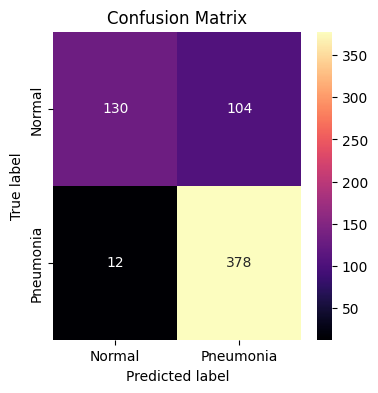

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

#true labels from the test generator
true_classes = test_generator.classes

#confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Calculate metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes)
auc = roc_auc_score(true_labels, predictions)  # Use predicted probabilities for AUC

#Print the metrics
print(f"TEST Accuracy: {accuracy:.6f}")
print(f"TEST Precision: {precision:.6f}")
print(f"TEST AUC: {auc:.6f}")


TEST Accuracy: 0.814103
TEST Precision: 0.784232
TEST AUC: 0.932183


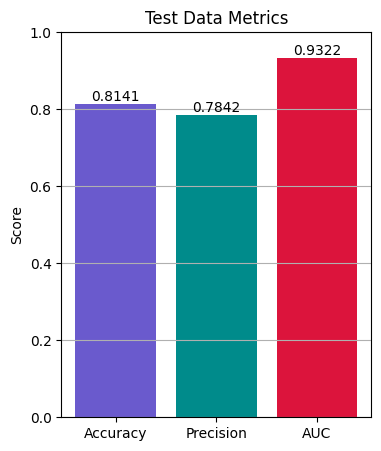

In [ ]:
#plot metrics

def plot_metrics(accuracy, precision, auc):
    metrics = ['Accuracy', 'Precision', 'AUC']
    values = [accuracy, precision, auc]

    plt.figure(figsize=(4, 5))
    bars = plt.bar(metrics, values, color=['slateblue', 'darkcyan', 'crimson'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

    plt.ylim(0, 1)
    plt.title('Test Data Metrics')
    plt.ylabel('Score')
    plt.grid(axis='y')
    plt.show()

# visualize metrics
plot_metrics(accuracy, precision, auc)